# Solution Exercise 5
This week, we are working on least squares fits and parameter estimation

In [7]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, chi2, lognorm

## Fit a polynomial
We start by fitting a polynomial to a given data set, in particular, a parabola. Compare a linear fit and a cubic fit to our parabolic fit and check the goodness of fits with chi squared distributions. Explore how the different uncertainties affect the outcome and uncertainties of the fit. 

Hint: You can consider a plot similar to the lecture notes week 5 page 29. and/or plot the residuals for the different cases.

Extra: Do you see any way to decide wether the data is better described by the parabola or the cubic?


In [8]:
# Create some data distribuited as parabola with normally distributed errors.
def parabola(x, a, b, c):
    return a*x**2 + b*x + c
def error(x, sigma):
    return norm.rvs(0.0, sigma, x.size) 
a = -0.1
b = 0
c = 1
sigma_y = 0.0015

x = np.linspace(0, 1, 21)
y_true = parabola(x, a, b, c)
delta_y = error(x, sigma_y)
y = y_true + delta_y
y_error = sigma_y * np.ones(x.size)

In [9]:
def fit_polynomial(x, y, degree, weight):
    pass

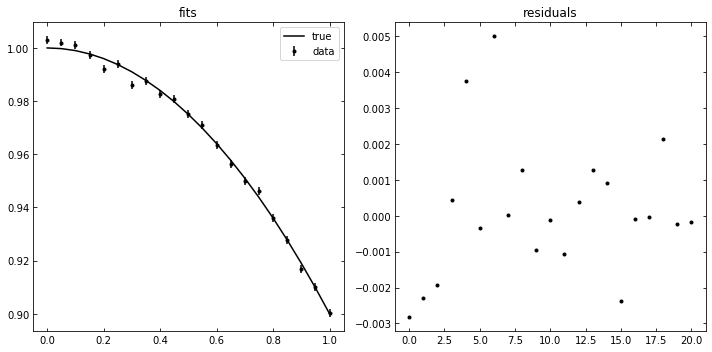

In [18]:
# Plot the fit results and their residuals
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('fits')
ax[0].errorbar(x, y, yerr=y_error, fmt='k.', label='data')
ax[0].plot(x, y_true, 'k-', label='true')
ax[0].legend()


ax[1].set_title('residuals')
ax[1].plot(y_true - y, 'k.', label='data')
f.tight_layout()

In [11]:
# Draw the plot form lecture notes week 5, page 29 and plot your chi-squares for the different fits.
pass

In [12]:
# ...

## Fit a nonlinear function
Next, we consider a Gaussian as an example of a nonlinear function. We are measuring some feature which has a Gaussian distribution in $x$. This could be an inhomogeneous spectral line for $x=E$ the energy of emitted photons. We are interested in the resonance frequency and the linewidth, i. e. we want to estimate them form our observations.   

Finally, create your own data set and vary the sample size!

In [45]:
def gaussian_parent(x, mu, sigma):
    return norm.pdf(x, mu, sigma)    

def gaussian_sample(mu, sigma, sample_size):
    return norm.rvs(mu, sigma, sample_size)

In [46]:
# Load data from disk. Format (3,12): (x, y, y_error) x N 
data = np.loadtxt('data')
x = data[0, :]
y = data[1, :]
y_error = data[2, :]
# The sample used to generate
sample = np.loadtxt('sample')

In [47]:
# Function we want to fit to our data set
def model_function(x, *args):
    pass

### Plot the result

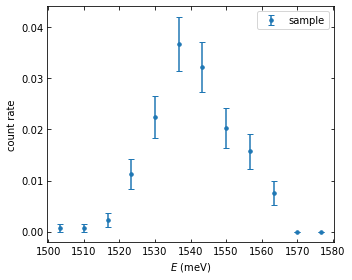

In [48]:
x_arr = np.linspace(1500, 1600, 101)

plt.figure(figsize=(5, 4))
plt.xlabel(r'$E$ (meV)')
plt.ylabel('count rate')
plt.errorbar(x, y, yerr=y_errors, fmt='.', ms=7, capsize=3, label='sample')
plt.legend()
plt.tight_layout()

## Biased estimator example
Take a lognormal sample and try to estimate its mean. Try it by fitting a Gaussian - what do you observe?

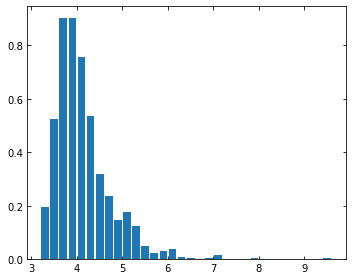

In [44]:
log_sample = lognorm.rvs(s=0.5, loc=3, scale=1, size=1000)

plt.figure(figsize=(5, 4))
h = plt.hist(log_sample, bins=32, rwidth=0.85, normed=True)
x_arr = np.linspace(2, 5, 51)
plt.tight_layout()

## Bonus: Errors in x and y
So far, we considered uncertainties only on y. Consider the following data set with errors in both x and y. Try to fit a line to the data below, taking into account both errors. Compare with fits neglecting the x errors or both.  
  
Hint: A detailed solution is already on the moodle. You may chose if you want to try to write your own solution, implement a known solution (see references in solution notebook) or just try it with the scipy package ODR (orthogonal distance regression). 
https://docs.scipy.org/doc/scipy/reference/odr.html
  
The solution contains a python implementation of York's equation, comparison with ODR and MC tests.  
Week 3: "Linear Regression errors x and y"

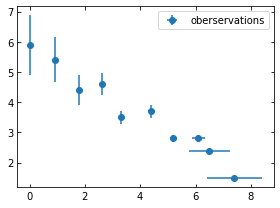

In [17]:
# Test data
X = np.array([0.0, 0.9, 1.8, 2.6, 3.3, 4.4, 5.2, 6.1, 6.5, 7.4])
Y = np.array([5.9, 5.4, 4.4, 4.6, 3.5, 3.7, 2.8, 2.8, 2.4, 1.5])
wX = np.array([1000, 1000, 500, 800, 200, 80, 60, 20, 1.8, 1])
wY = np.array([1, 1.8, 4, 8, 20, 20, 70, 70, 100, 500])
sigma_x = 1.0/np.sqrt(wX)
sigma_y = 1.0/np.sqrt(wY)

plt.figure(figsize=(4, 3))
plt.errorbar(X, Y, xerr=sigma_x, yerr=sigma_y, fmt='o', label='oberservations')
plt.legend()
plt.tight_layout()